Observations:
There is seems to be a strong correlation between mouse weight and tumor size, at least for the drug Capomulin
The Ramicane and Capomulin samples seem to be more indicative of their overall results than the other drugs, based on SEM. They also have a much lower variance.
Not all mice have been tested for the same duration, so it is hard to get a true feel for the effects of each drug. We could look at results from certain time points to get a feel but the sample size could get too low.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [3]:
dfMouseRaw = pd.read_csv("data/Mouse_metadata.csv")
dfStudyRaw = pd.read_csv("data/Study_results.csv")

dfMergedRaw = pd.merge(dfMouseRaw, dfStudyRaw, on = "Mouse ID")

dfMergedRaw.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [4]:
len(dfMergedRaw['Mouse ID'].value_counts())

249

In [5]:
dfDuplicateMouse = dfMergedRaw[dfMergedRaw.duplicated(['Mouse ID',  'Timepoint'])]
duplicateMouseID = dfDuplicateMouse['Mouse ID'].iloc[0]

In [6]:
dfMergedClean = dfMergedRaw.loc[dfMergedRaw['Mouse ID'] != duplicateMouseID]
len(dfMergedClean['Mouse ID'].value_counts())

248

In [7]:
drugNames = []
drugMean = []
drugMedian = []
drugVariance = []
drugSTD = []
drugSEM = []

drugNames = dfMergedClean['Drug Regimen'].unique()

for drug in drugNames:
    dfCurrDrug = dfMergedClean.loc[dfMergedRaw['Drug Regimen'] == drug]
    dfTumors = dfCurrDrug["Tumor Volume (mm3)"]
    
    drugMean.append(round(dfTumors.mean(), 2))
    drugMedian.append(round(dfTumors.median(), 2))
    drugVariance.append(dfTumors.var())
    drugSTD.append(dfTumors.std())
    drugSEM.append(dfTumors.sem())
    
dfDrugTumorData = pd.DataFrame({'Drug Name': drugNames,
                                'Mean Tumor Size': drugMean,
                                'Median Tumor Size': drugMedian,
                                'Tumor Size Variance': drugVariance,
                                'Tumor Size STD': drugSTD,
                                'Tumor Size SEM': drugSEM})

dfDrugTumorData

,Drug Name,Mean Tumor Size,Median Tumor Size,Tumor Size Variance,Tumor Size STD,Tumor Size SEM
0,Ramicane,40.22,40.67,23.486704,4.846308,0.320955
1,Capomulin,40.68,41.56,24.947764,4.994774,0.329346
2,Infubinol,52.88,51.82,43.128684,6.567243,0.492236
3,Placebo,54.03,52.29,61.168083,7.821003,0.581331
4,Ceftamin,52.59,51.78,39.290177,6.268188,0.469821
5,Stelasyn,54.23,52.43,59.450562,7.710419,0.573111
6,Zoniferol,53.24,51.82,48.533355,6.966589,0.516398
7,Ketapril,55.24,53.70,68.553577,8.279709,0.603860
8,Propriva,52.32,50.45,43.852013,6.622085,0.544332
9,Naftisol,54.33,52.51,66.173479,8.134708,0.596466


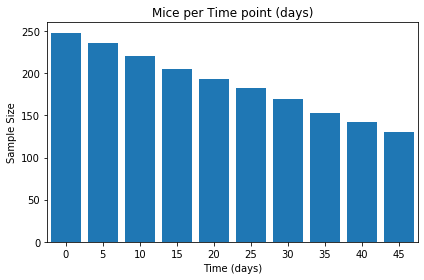

Timepoint
0     248
5     236
10    221
15    205
20    193
25    182
30    170
35    153
40    142
45    130
Name: Timepoint, dtype: int64

In [24]:
gTimePoints = dfMergedClean.groupby('Timepoint')
sValues = gTimePoints['Timepoint'].count()
timeStamps = dfMergedClean['Timepoint'].unique()

numbers = np.char.mod('%d', timeStamps)
plt.bar(numbers, sValues, align = 'center')

plt.xlabel("Time (days)")
plt.ylabel("Sample Size")
plt.title("Mice per Time point (days)")
plt.xlim(-0.5, len(timeStamps) -0.5)


plt.tight_layout()
plt.show()

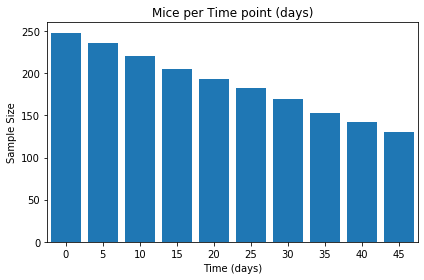

In [9]:
sValues.plot(kind = "bar", title = "Mice per Time Point (Days)", width = 0.8, rot = 0)
plt.xlabel("Time (days)")
plt.ylabel("Sample Size")
plt.title("Mice per Time point (days)")
plt.xlim(-0.5, len(sValues) -0.5)


plt.tight_layout()
plt.show()

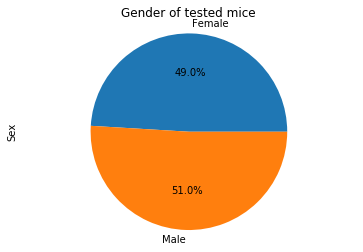

In [10]:
gGenders = dfMergedClean.groupby('Sex')
sGenders = gGenders['Sex'].count()

sGenders.reindex(['Female', 'Male'])

plt.pie(sGenders, labels = sGenders.keys(), autopct="%1.1f%%")
plt.ylabel('Sex')
plt.title("Gender of tested mice")
plt.axis('equal')
plt.show()

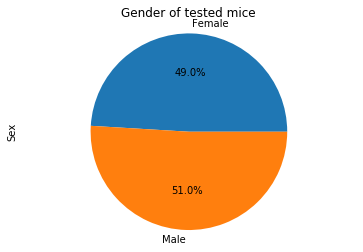

In [11]:
sGenders.plot(kind = 'pie', autopct='%1.1f%%', title = "Gender of tested mice")
plt.axis('equal')
plt.show()

In [23]:
uniqueMice = dfMergedClean['Mouse ID'].unique()

bestDrugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
bestDrugsInfo = {'Capomulin': [], 
                 'Ramicane': [],
                 'Infubinol': [],
                 'Ceftamin': []}

for mouse in uniqueMice:
    currMouseData = dfMergedClean.loc[dfMergedClean['Mouse ID'] == mouse]
    if(currMouseData['Drug Regimen'].iloc[0] in bestDrugs):
        maxID = len(currMouseData.index) - 1
        currMouseTimePoint = currMouseData.iloc[maxID]
        bestDrugsInfo[currMouseTimePoint['Drug Regimen']].append(currMouseTimePoint['Tumor Volume (mm3)'])
        

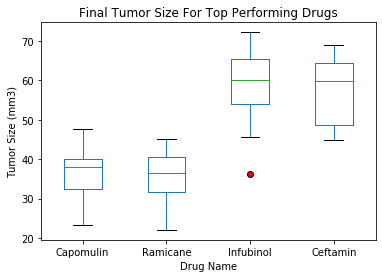

In [13]:
dfBestDrugs = pd.DataFrame(bestDrugsInfo)
for drug in bestDrugs:
    quartiles = dfBestDrugs[drug].quantile([0.25, 0.5, 0.75])
    lowerQ = quartiles[0.25]
    upperQ = quartiles[0.75]
    quartileRange = upperQ - lowerQ

    lowerBound = lowerQ - (1.5 * quartileRange)
    upperBound = upperQ + (1.5 * quartileRange)

    outliers = (dfBestDrugs.loc[(dfBestDrugs[drug] < lowerBound) | (dfBestDrugs[drug] > upperBound)])[drug]


red_circle = dict(markerfacecolor='r', marker='o')
#plt.box(dfTest.plot(kind= 'box'))
dfBestDrugs.plot(kind = 'box', flierprops = red_circle, title = "Final Tumor Size For Top Performing Drugs")
plt.ylabel("Tumor Size (mm3)")
plt.xlabel("Drug Name")

plt.show()

In [14]:
capAverage = []
dfCap = dfMergedClean.loc[dfMergedClean['Drug Regimen'] == 'Capomulin']

uniqueCapWeight = dfCap['Weight (g)'].unique()

for weight in uniqueCapWeight:
    dfWeights = dfCap['Tumor Volume (mm3)'].loc[dfCap['Weight (g)'] == weight]
    capAverage.append(dfWeights.mean())


Text(0.5, 1.0, 'Mouse weight vs. average tumor volume for Capomulin')

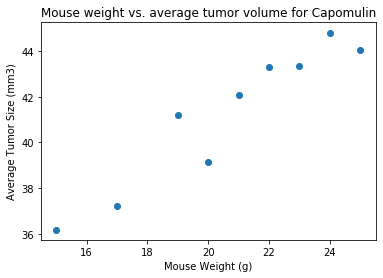

In [15]:
plt.scatter(uniqueCapWeight, capAverage)

plt.xlabel("Mouse Weight (g)")
plt.ylabel('Average Tumor Size (mm3)')
plt.title("Mouse weight vs. average tumor volume for Capomulin")

In [16]:
print(f"Correlation between mouse weight and average tumor size: {round(st.pearsonr(uniqueCapWeight,capAverage)[0],2)}")
#seems pretty good

Correlation between mouse weight and average tumor size: 0.95


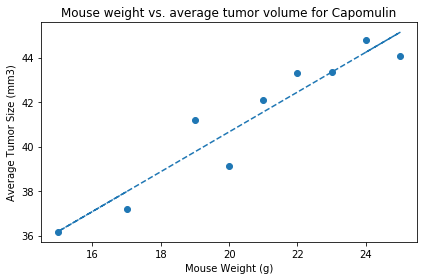

In [17]:
slope, intr, r, p, stderr = st.linregress(uniqueCapWeight, capAverage)

fit = slope * uniqueCapWeight + intr

plt.scatter(uniqueCapWeight, capAverage)

plt.xlabel("Mouse Weight (g)")
plt.ylabel('Average Tumor Size (mm3)')
plt.title("Mouse weight vs. average tumor volume for Capomulin")
plt.plot(uniqueCapWeight,fit,"--")
plt.tight_layout()
plt.show()